In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools

# Load the data
pizza_data = pd.read_csv("D:\SCMA632__FIRE632\Stats\Assignment\A4\pizza_data.csv")

# Convert relevant columns to category type
pizza_data['brand'] = pizza_data['brand'].astype('category')
pizza_data['price'] = pizza_data['price'].astype('category')

# Check the conversion
print(pizza_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   brand     16 non-null     category
 1   price     16 non-null     category
 2   weight    16 non-null     object  
 3   crust     16 non-null     object  
 4   cheese    16 non-null     object  
 5   size      16 non-null     object  
 6   toppings  16 non-null     object  
 7   spicy     16 non-null     object  
 8   ranking   16 non-null     int64   
dtypes: category(2), int64(1), object(6)
memory usage: 1.4+ KB
None


In [4]:
# Define a simplified set of attributes and levels
attributes = {
    'brand': pizza_data['brand'].cat.categories,
    'price': pizza_data['price'].cat.categories
}

# Create the design matrix
design = pd.DataFrame(list(itertools.product(*attributes.values())), columns=attributes.keys())

# Assuming 'ranking' column represents respondent evaluations
ratings = pizza_data['ranking']

# Combine the design matrix with ratings
conjoint_data = pd.concat([design, ratings], axis=1)

# Ensure all the data in conjoint_data is in numeric format where needed
conjoint_data = pd.get_dummies(conjoint_data, drop_first=True)

# Convert boolean columns to integers if necessary
for col in conjoint_data.columns:
    if conjoint_data[col].dtype == 'bool':
        conjoint_data[col] = conjoint_data[col].astype(int)

In [6]:
# Prepare the data for the linear model
X = conjoint_data.drop(columns='ranking')
y = conjoint_data['ranking'].astype(float)

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Check the types of data
print(X.dtypes)
print(y.dtypes)

# Ensure no data is cast as object
X = X.apply(pd.to_numeric)
y = pd.to_numeric(y)

# Run the linear model
ca_model = sm.OLS(y, X).fit()

# Print the results
print(ca_model.summary())

const               float64
brand_Onesta          int32
brand_Oven Story      int32
brand_Pizza hut       int32
price_$2.00           int32
price_$3.00           int32
price_$4.00           int32
dtype: object
float64
                            OLS Regression Results                            
Dep. Variable:                ranking   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     2.143
Date:                Tue, 09 Jul 2024   Prob (F-statistic):              0.146
Time:                        00:05:21   Log-Likelihood:                -40.055
No. Observations:                  16   AIC:                             94.11
Df Residuals:                       9   BIC:                             99.52
Df Model:                           6                                         
Covariance Type:            nonrobust                                  

D:\Python\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


const               8.5
brand_Onesta       -0.5
brand_Oven Story   -1.0
brand_Pizza hut     1.5
price_$2.00         5.5
price_$3.00        -3.5
price_$4.00        -2.0
dtype: float64


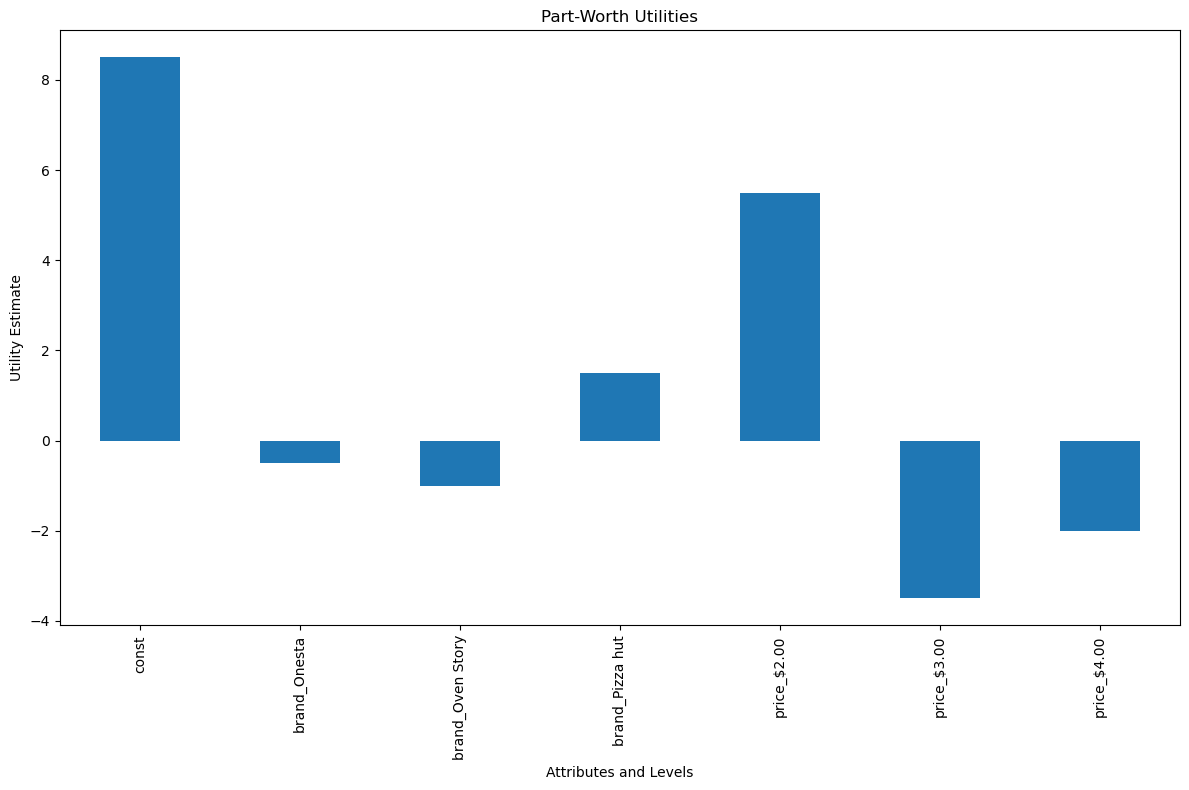

In [7]:
# Extract part-worth utilities (coefficients)
utilities = ca_model.params
print(utilities)

# Plot the part-worth utilities
plt.figure(figsize=(12, 8))
utilities.plot(kind='bar')
plt.title('Part-Worth Utilities')
plt.xlabel('Attributes and Levels')
plt.ylabel('Utility Estimate')
plt.tight_layout()
plt.show()